In [1]:
import networkx as nx
import pandas as pd
import ast
%matplotlib inline

In [2]:
data = pd.read_csv('../../../data/tweets.csv')

In [3]:
data = data[['user_key', 'mentions']]
data = data[:4000]
num_rows = len(data['user_key'])

In [4]:
nodes = {}
G = nx.Graph()
for index, row in data.iterrows():
    init_node = row['user_key']
    if init_node not in nodes:
        nodes[init_node] = 1
        G.add_node(init_node)
    mentioned_list = ast.literal_eval(row['mentions'])
    for user in mentioned_list:
        if user not in nodes:
            nodes[user] = 1
            G.add_node(user)
        G.add_edge(init_node, user)

In [5]:
print(len(data))

4000


In [6]:
G.remove_nodes_from(list(nx.isolates(G)))
largest_cc = max(nx.connected_component_subgraphs(G), key=len)

In [7]:
nodes_in_cc = set(list(largest_cc.nodes))
added_nodes = {}
indexes_remove = []
for index, row in data.iterrows():
    init_node = row['user_key']
    found_in_cc = False
    if init_node in nodes_in_cc:
        continue
    mentioned_list = ast.literal_eval(row['mentions'])
    for user in mentioned_list:
        if user in nodes_in_cc:
            found_in_cc = True
            break
    if found_in_cc:
        continue
    indexes_remove.append(index)

data = data.drop(indexes_remove)

In [8]:
nodes = {}
directedG = nx.DiGraph()
for index, row in data.iterrows():
    init_node = row['user_key']
    if init_node not in nodes:
        nodes[init_node] = 1
        directedG.add_node(init_node)
    mentioned_list = ast.literal_eval(row['mentions'])
    for user in mentioned_list:
        if user not in nodes:
            nodes[user] = 1
            directedG.add_node(user)
        directedG.add_edge(init_node, user)

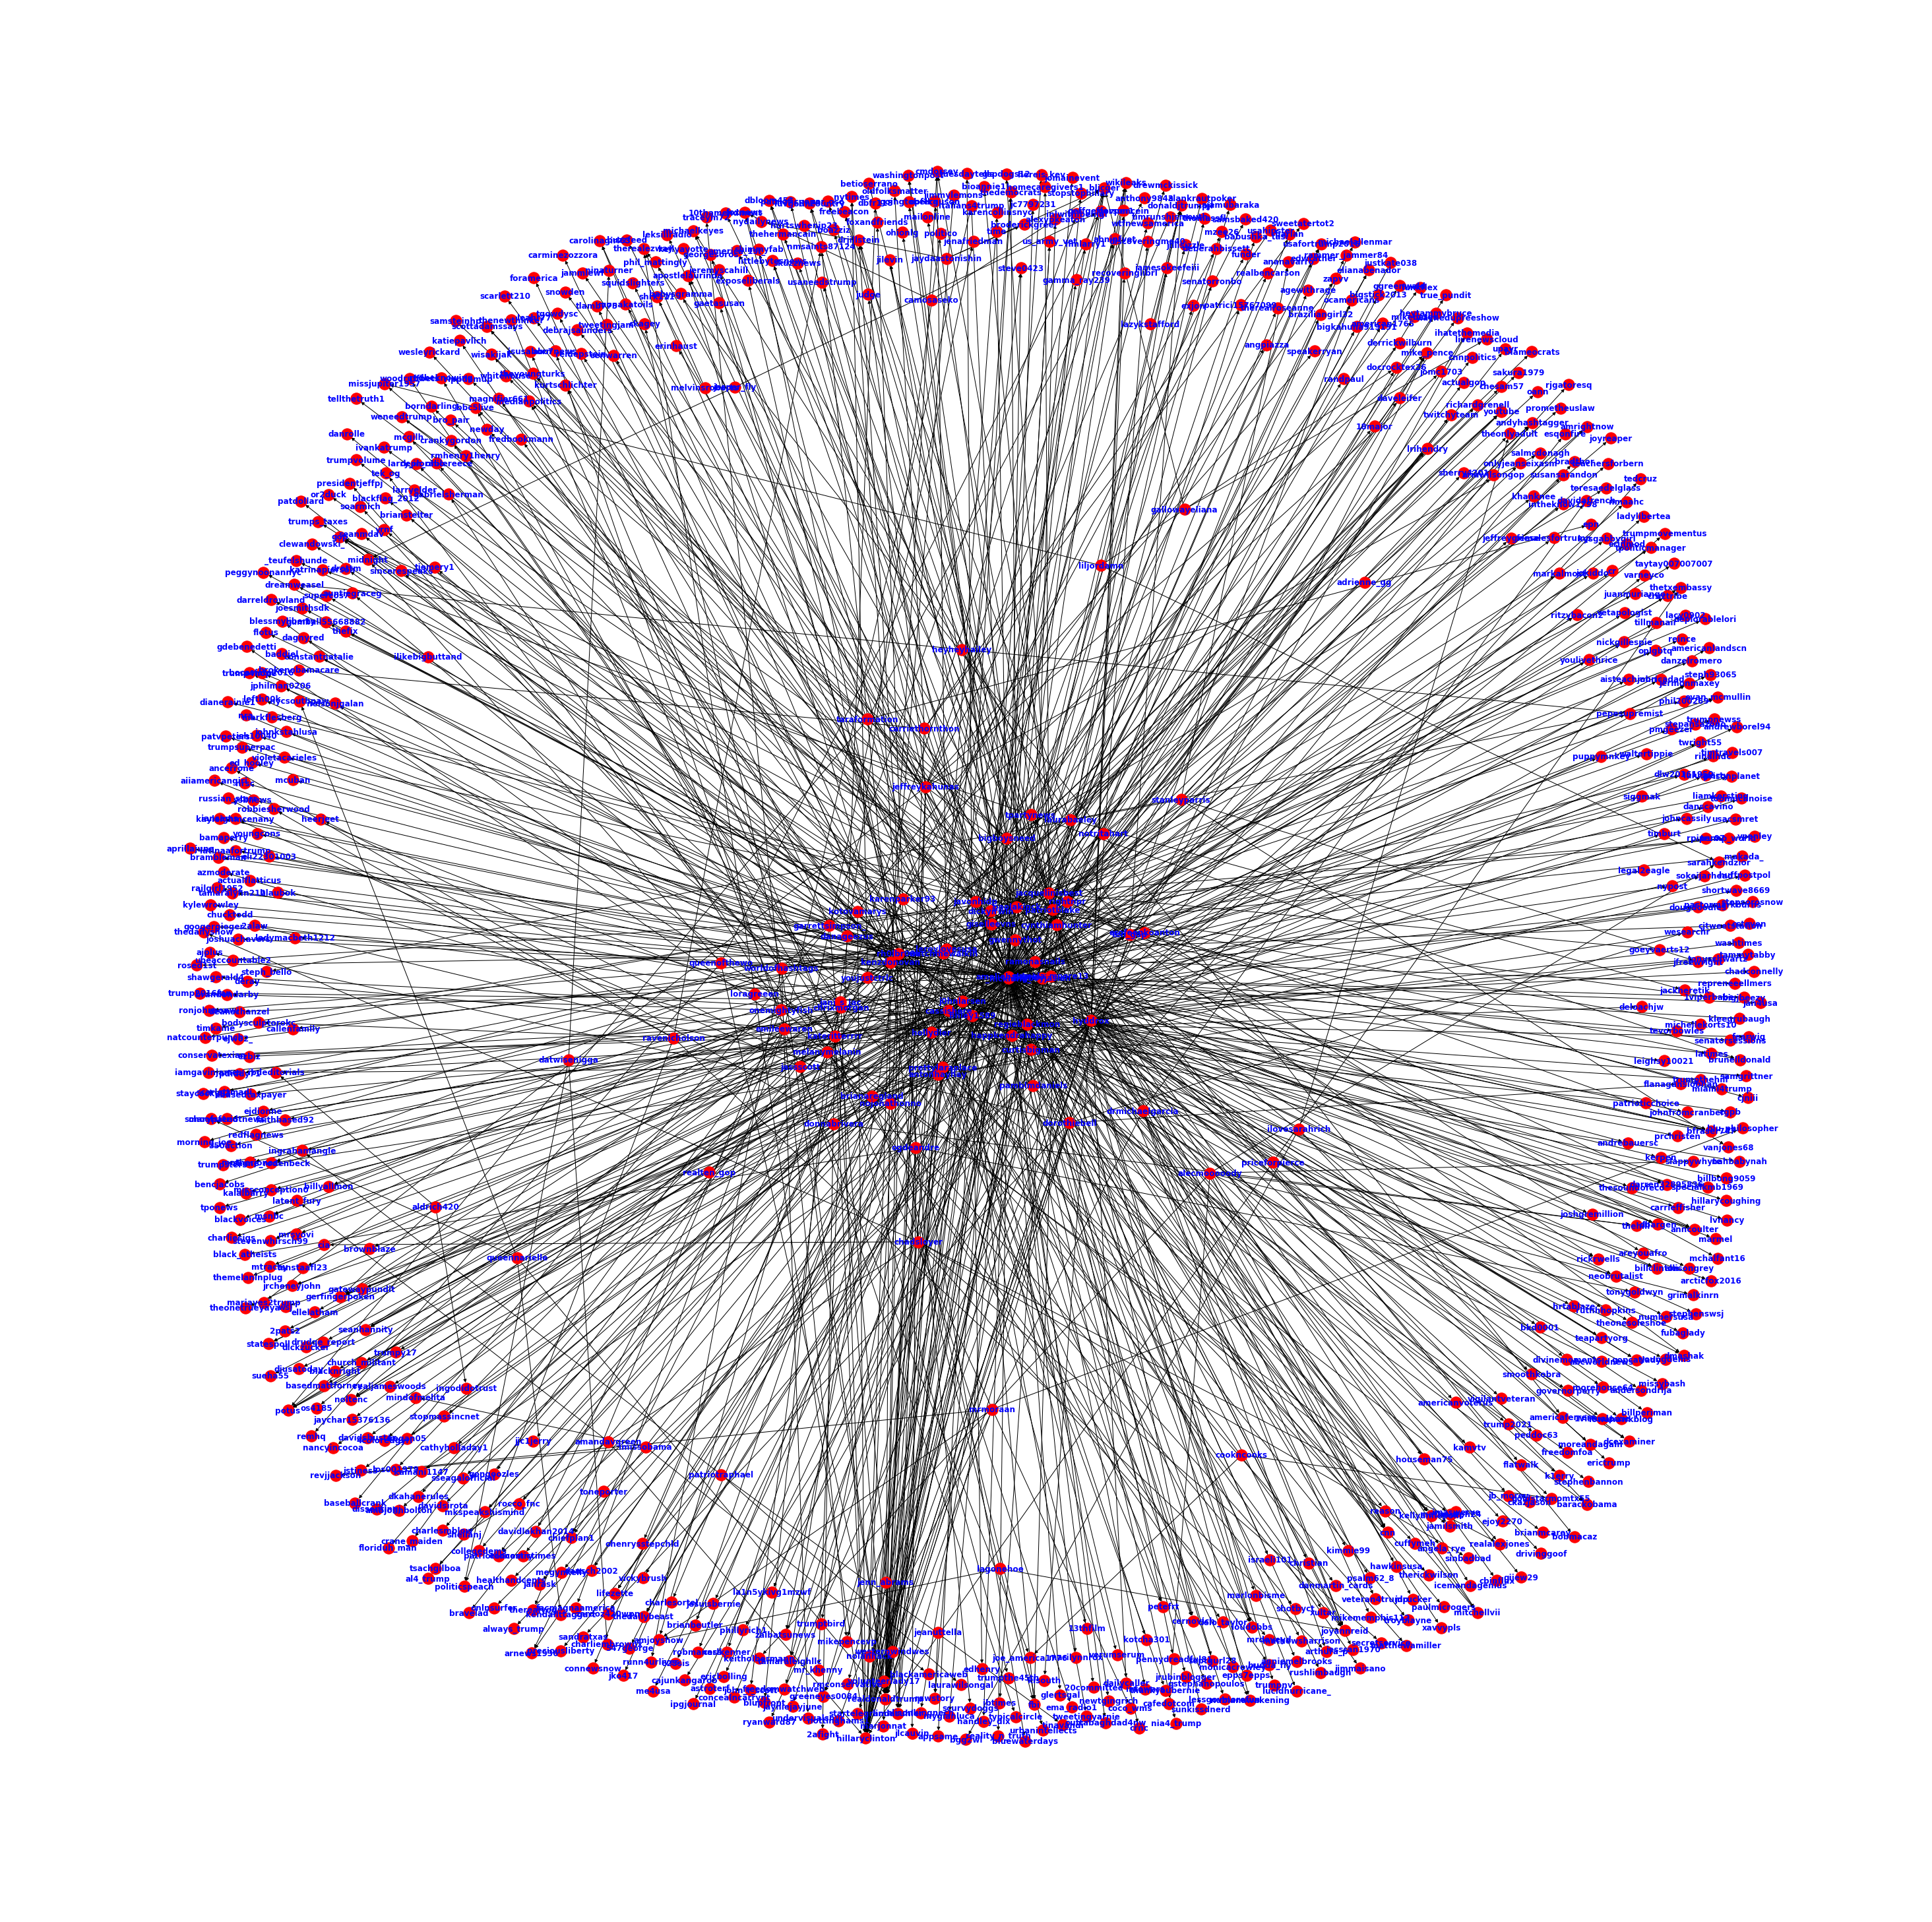

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40, 40)) 
nx.draw(directedG, with_labels=True, font_weight='bold', font_color="b", node_size=500)
plt.axis('equal') 
plt.show()
fig.savefig('directedGraph.svg')
fig.savefig('directedGraph.png') 

In [ ]:
plt.show()

# Things to do
* Look at the most connected node
* Degrees of separation
* What about the other WCCs?
* Any fake users vs real users disparities?
* How much does the largest WCC account for in terms of nodes and edges?